### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')


# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Are there Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Check distribution of customers via gender
reviews['gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: gender, dtype: float64

*Female Customer Base is 10% higher than the Male customer base*

In [6]:
# Check the levels of education
reviews['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

*The customer base tends to be highly educated with only a very small percentage of non diploma holders* 

In [7]:
# check the language
reviews['language'].unique()

array(['EN'], dtype=object)

*This column doesn't give any information and can be dropped*

In [8]:
# check platform
reviews['platform'].unique()

array(['Web'], dtype=object)

*This column doesn't give any information and can be dropped*

In [9]:
# Check no of products
reviews['product'].nunique()

200

*There are 200 products on offer, however we do not know how many are turtle owned*

In [10]:
# Descriptive statistics of the numeric columns
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


*It looks like there are some outliers in the data we need to explore further*

## 2. Drop columns

In [11]:
# Drop unnecessary columns with no information.
reviews_1 = reviews.drop(['language','platform'], axis=1)

# View column names.
reviews_1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [12]:
# Rename the column headers.
reviews_1.rename(columns = {'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score' }, inplace = True)

# View column names.
reviews_1.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [13]:
# Create a CSV file as the cleaned output.
reviews_1.to_csv('turtle_reviews_cleaned.csv', index=False)

In [14]:
# Import new CSV file with Pandas.
df = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


The key assumptions of Linear Regression are - 

a.	Linearity

b.	Homoscedasticity (Multivariate)

c.	Independence (Mutlivariate)

d.	Normality

e.	Absence of multicollinearity (Multivariate)


*Outliers have a big effect on regression, so it is a robust practice to check for outliers before carrying out the regression process*

## 5. Linear regression

### 5a) spending vs loyalty

Text(0.5, 1.0, 'Spending Score Vs Loyalty Points')

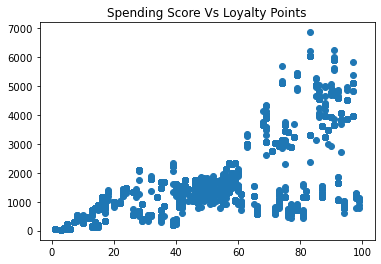

In [15]:
# Linearity
# Independent variable.
x = df['spending_score']

# Dependent variable.
y = df['loyalty_points']


# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.title('Spending Score Vs Loyalty Points')

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Spending Score Distribution Plot')

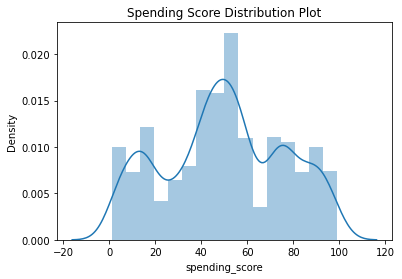

In [16]:
# Check the distribution
sns.distplot(df['spending_score'])
plt.title('Spending Score Distribution Plot')


In [17]:
# Check for outliers in Spending Score
quartile_1, quartile_3 = np.percentile(df['spending_score'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
np.where((df['spending_score'] > upper_bound) | (df['spending_score'] < lower_bound))

(array([], dtype=int64),)

In [18]:

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.92e-263
Time:                        19:48:25   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [20]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-75.052663) + 33.061693 * df['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

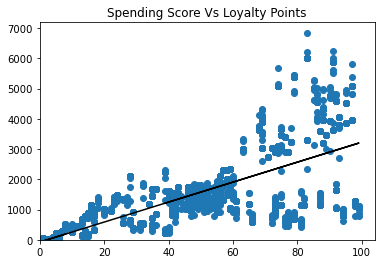

In [21]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('Spending Score Vs Loyalty Points')

# View the plot.
plt.show()

### 5b) remuneration vs loyalty

In [22]:
# Check for outliers in remuneration
quartile_1, quartile_3 = np.percentile(df['remuneration'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
np.where((df['remuneration'] > upper_bound) | (df['remuneration'] < lower_bound))

(array([], dtype=int64),)

Text(0.5, 1.0, 'Remuneration Vs Loyalty Points')

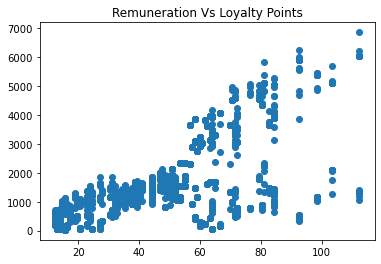

In [23]:
# Define the dependent variable.
y = df['loyalty_points'] 

# Define the independent variable.
x = df['remuneration'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.title('Remuneration Vs Loyalty Points')

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='remuneration', ylabel='Density'>

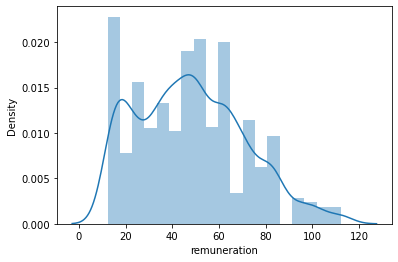

In [24]:
# Check the distribution
sns.distplot(df['remuneration'])

In [25]:

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.43e-209
Time:                        19:48:25   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [27]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-65.686513) + 34.187825 * df['remuneration']

# View the output.
y_pred


0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

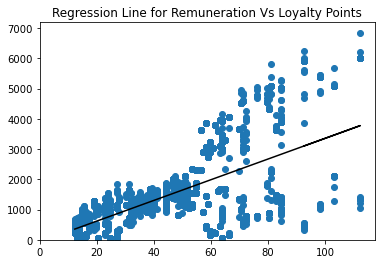

In [28]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title('Regression Line for Remuneration Vs Loyalty Points')
plt.show()


### 5c) age vs loyalty

In [29]:
# Check for outliers in age
quartile_1, quartile_3 = np.percentile(df['age'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
np.where((df['age'] > upper_bound) | (df['age'] < lower_bound))

(array([], dtype=int64),)

Text(0.5, 1.0, 'Age Vs Loyalty Points')

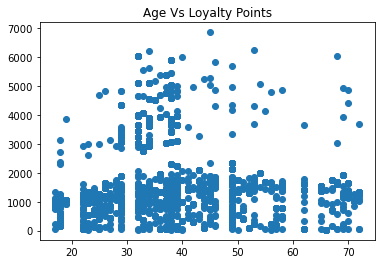

In [30]:
# Define the dependent variable.
y = df['loyalty_points'] 

# Define the independent variable.
x = df['age'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)
plt.title('Age Vs Loyalty Points')

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

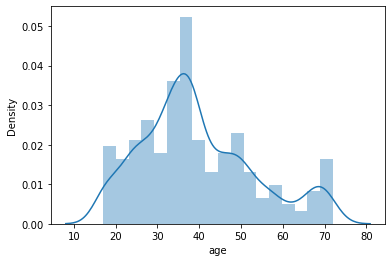

In [31]:
# Check the distribution
sns.distplot(df['age'])

In [32]:

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0577
Time:                        19:48:26   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [34]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-65.686513) + 34.187825 * df['age']

# View the output.
y_pred


0        549.694337
1        720.633462
2        686.445637
3        789.009112
4       1062.511712
           ...     
1995    1199.263012
1996    1404.389962
1997    1096.699537
1998    1096.699537
1999    1028.323887
Name: age, Length: 2000, dtype: float64

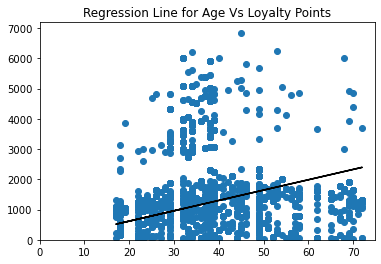

In [35]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.title('Regression Line for Age Vs Loyalty Points')
plt.show()

C:\Users\palla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loyalty_points', ylabel='Density'>

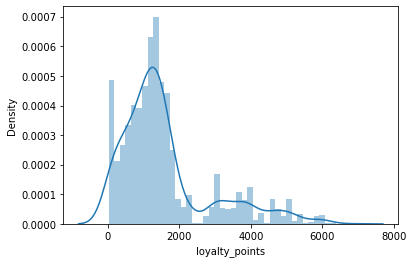

In [36]:
# visualise the distribution of y
# Check the distribution
sns.distplot(df['loyalty_points'])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'remuneration'}>],
       [<AxesSubplot:title={'center':'spending_score'}>,
        <AxesSubplot:title={'center':'loyalty_points'}>],
       [<AxesSubplot:title={'center':'product'}>, <AxesSubplot:>]],
      dtype=object)

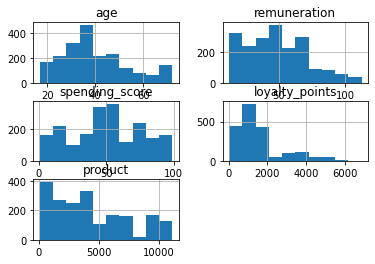

In [37]:
# visualize the distribution of the numerical columns
df.hist()

array([[<AxesSubplot:xlabel='remuneration', ylabel='remuneration'>,
        <AxesSubplot:xlabel='age', ylabel='remuneration'>,
        <AxesSubplot:xlabel='spending_score', ylabel='remuneration'>,
        <AxesSubplot:xlabel='loyalty_points', ylabel='remuneration'>],
       [<AxesSubplot:xlabel='remuneration', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='spending_score', ylabel='age'>,
        <AxesSubplot:xlabel='loyalty_points', ylabel='age'>],
       [<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>,
        <AxesSubplot:xlabel='age', ylabel='spending_score'>,
        <AxesSubplot:xlabel='spending_score', ylabel='spending_score'>,
        <AxesSubplot:xlabel='loyalty_points', ylabel='spending_score'>],
       [<AxesSubplot:xlabel='remuneration', ylabel='loyalty_points'>,
        <AxesSubplot:xlabel='age', ylabel='loyalty_points'>,
        <AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>,
        <AxesSubplot:

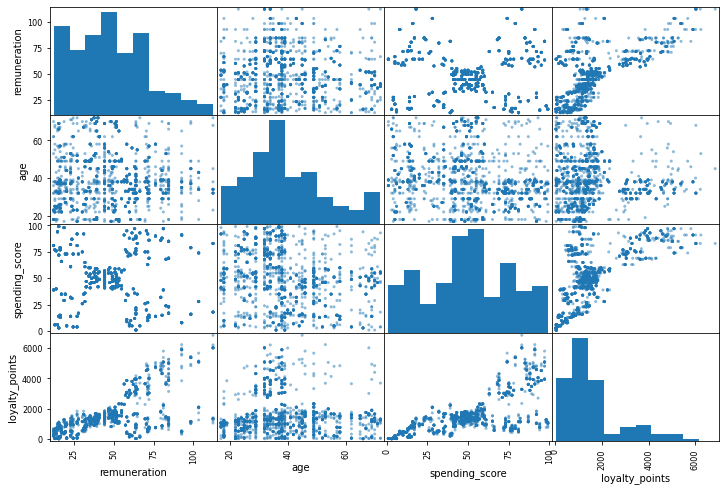

In [38]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['remuneration', 'age', 'spending_score', 'loyalty_points']], figsize=(12, 8) )

In [39]:
# Check for positive > 0.5 or negative < -.5 correlation of features
corr_matrix = df[['remuneration', 'age', 'spending_score', 'loyalty_points']].corr()
cond = (corr_matrix['loyalty_points'] > 0.5) | (corr_matrix['loyalty_points'] < -0.5)
corr_matrix[cond]

,remuneration,age,spending_score,loyalty_points
remuneration,1.000000,-0.005708,0.005612,0.616065
spending_score,0.005612,-0.224334,1.000000,0.672310
loyalty_points,0.616065,-0.042445,0.672310,1.000000


In [40]:
corr_matrix['loyalty_points'].sort_values(ascending=False)

loyalty_points    1.000000
spending_score    0.672310
remuneration      0.616065
age              -0.042445
Name: loyalty_points, dtype: float64

In [41]:
# Multi regresssion with OLS
# Define the independent variable.
x = df[['remuneration', 'age',  'spending_score']] 

In [42]:

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        19:48:28   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2203.0598     52.361    -42.075      0.000   -2305.747   -2100.372
x[0]          34.0084      0.497     68.427      0.000      33.034      34.983
x[1]          11.0607      0.869     12.730      0.000       9.357      12.765
x[2]          34.1832      0.452     75.638      0.000      33.297      35.070
==============================================================================
Omnibus:                       22.644   Durbin-Watson:                   3.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.110
Skew:                           0.227   Prob(JB):                     5.82e-06
Kurtosis:                       3.290   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Observations and insights

Our Dependent Variable is Loyalty Points, and the independent set of Features include – Spending Score, Remuneration & Age 
1.	Spending Score – Scatterplot is selected to test the relationship between spending score and loyalty points. We see a somewhat linear relationship with a lot of scatter towards the end. We see that an increase in spending score doesn’t always result in an increase in the loyalty points. It is worth it to see in what business scenarios this becomes possible. We also see the distribution of spending score and that it has heavy tails. It is close to a normal distribution, but we see irregularities at the lower values and higher. The OLS Best fit line for Spending Score Vs Loyalty also show us that as spending score increases, it is hard to predict the loyalty points based on our best fit line. 
2. Similarly for Remuneration we see a similar pattern
3. Lastly for the feature Age, we don’t see a linear relationship telling us that we could drop this column.
4. Distribution of the dependent variable – Loyalty Points, shows a right tailed distribution

Observation
- Very weak predictors individually but a multiregression for the same gives us a good result




# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [43]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [45]:
# Drop unnecessary columns.
df2 = df2[['remuneration','spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [46]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [47]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

Text(0.5, 1.0, 'Remuneration Vs Spending Score')

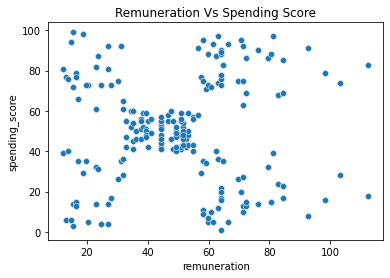

In [48]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                data = df2)
plt.title('Remuneration Vs Spending Score')

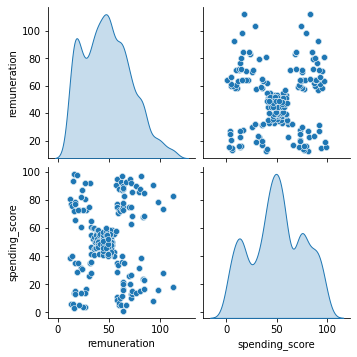

In [49]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, 
             vars = df2,
             diag_kind = "kde")

## 3. Elbow and silhoutte methods

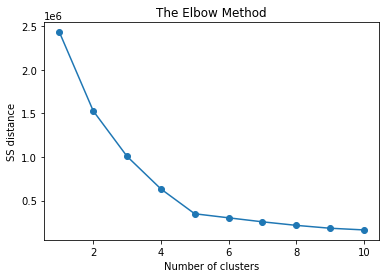

In [50]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

*Applying the elbow method on our data shows us that k = 4/5/6 can give us best results*

Text(0, 0.5, 'Sil')

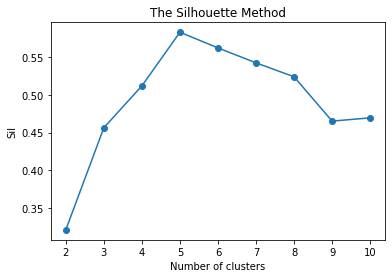

In [51]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")


*Applying the silhouette method shows us that k= 5 could possibly be the best result*

## 4. Evaluate k-means model at different values of *k*

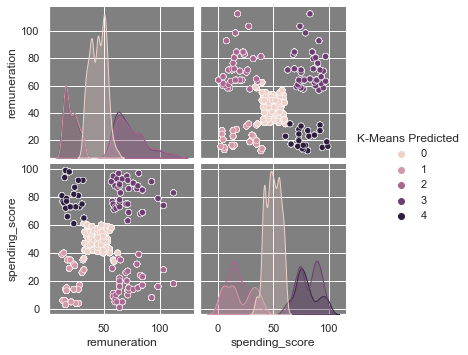

In [52]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
#plt.rcParams['figure.facecolor'] = 'black'
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'white'})
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')




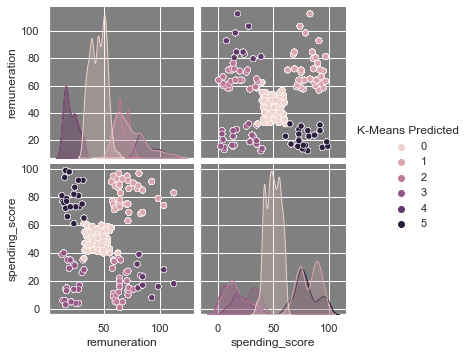

In [53]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

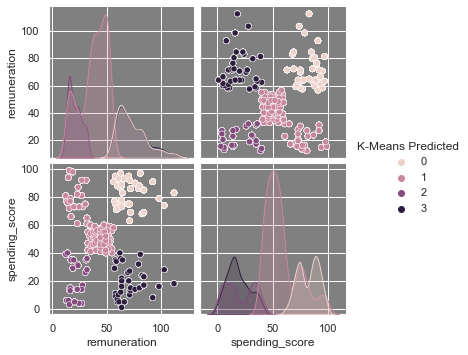

In [54]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

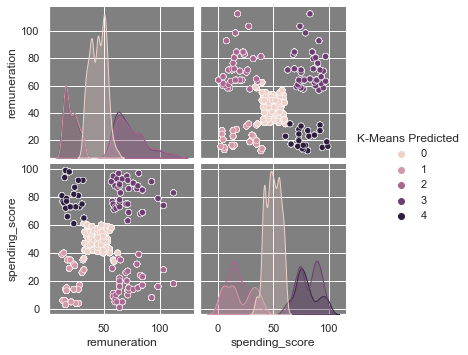

In [55]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [56]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

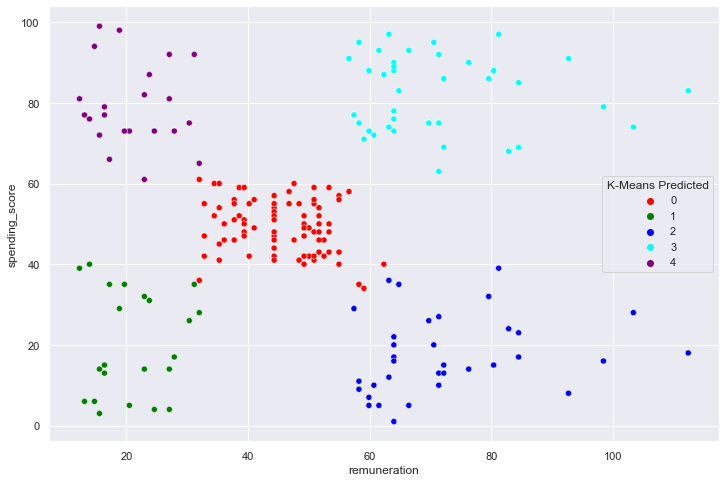

In [57]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'cyan', 'purple'])
# View the DataFrame.


In [58]:
# view the dataframe
df2.head(5)


,remuneration,spending_score,K-Means Predicted
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1


## 7. Discuss: Insights and observations

***Your observations here...***
Our chosen value of clusters is 5 and this gives us a classification like this
1. Cluster0 - Medium remuneration, medium spend
2. Cluster1 - low remuneration, low spend
3. Cluster2 - high remuneration, low spend
4. Cluster3 - high remuneration, high spend
5. Cluster4 - low remuneration, high spend

It is important to note here that kmeans does not give the same results/cluster names the next time, it might or might not change, so we have to relook this data and reconfirm the groups everytime we run the kmeans


# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [59]:
!pip install textblob

In [60]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_cleaned.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [62]:
stop_words = set(stopwords.words('english'))

In [63]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

# View results.
all_english_words

NameError: name 'words' is not defined

In [ ]:
# Keep necessary columns. Drop unnecessary columns.
df_review_summary = df3[['review','summary']]

# View DataFrame.
df_review_summary

In [ ]:
# Determine if there are any missing values.
df_review_summary.isna().sum()

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [ ]:
# Review: Change all to lower case and join with a space.
df_review = df_review_summary['review'].str.lower()
df_review

In [ ]:
text_review = " ".join(review for review in df_review)

text_review

In [ ]:
df_review_new = pd.DataFrame(word_tokenize(text_review))
df_review_new

In [ ]:
df3 = [x for x in df_review_new[0] if x not in stop_words and x.isalpha() and x in all_english_words] 
#[[[y for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df2]]
df3 = pd.DataFrame(df3)
df3


In [ ]:
df3 = df3.drop_duplicates()

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Start with one review:
text3 = " ".join(x for x in df3[0])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Summary: Change all to lower case and join with a space.
df_summary = df_review_summary['summary'].str.lower()
df_summary

In [ ]:
text_summary = " ".join(summary for summary in df_summary)

text_summary

In [ ]:
df_summary_new = pd.DataFrame(word_tokenize(text_summary))
df_summary_new

In [ ]:
df4 = [x for x in df_summary_new[0] if x not in stop_words and x.isalpha() and x in all_english_words] 
#[[[y for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df2]]
df4 = pd.DataFrame(df4)
df4

In [ ]:
df4 = df4.drop_duplicates()

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Start with one review:
text4 = " ".join(x for x in df4[0])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Replace all the puncuations in summary column.
df_summary1 = [word_tokenize(_) for _ in df_summary]

# View output.
df_summary1

### 2c) Drop duplicates in both columns

In [ ]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
from nltk.corpus import words

nltk.download('words')
all_english_words = set(words.words())
stop_words = set(stopwords.words('english'))

In [ ]:
df_review2 = [[y.lower() for y in x if y.lower() not in stop_words and 
               y.isalpha() and y.lower() in all_english_words] for x in df_review1]
df_review2

In [ ]:
df_summary2 = [[y.lower() for y in x if y.lower() not in stop_words and 
               y.isalpha() and y.lower() in all_english_words] for x in df_summary1]
df_summary2

In [ ]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

In [ ]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [ ]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity_reviews = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df_review2}

In [ ]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity_reviews = pd.DataFrame(df_polarity_reviews).T

# View the DataFrame.
polarity_reviews

In [ ]:
#20 most positive cleaned tweets 
polarity_reviews.sort_values('compound', ascending=0).head(20)

In [ ]:
#20 most negative
polarity_reviews.sort_values('compound', ascending=1).head(20)

## 7. Discuss: Insights and observations

***Your observations here...***
We can use the words and positive/negative reviews/summary to create efficient marketing strategy, identify product growth areas etc
We can further filter the words / summary / reviews to clean up our data

# 